In [1]:
import pandas as pd

options = pd.read_csv("../data/services.csv")
services = options.iloc[:,1]
services = [a for a in services if a is not None and type(a) == str and a != 'nan']
count = 1
for s in services:
    print(str(count) + '. ' + s)
    count += 1
    
options.head()

1. Cell Transformation and Plate Verification of LB-agar Plate with Appropriate Resistance
2. Storage of Bacteria on LB Agar Plate with Appropriate Resistance
3. Clean Up and Concentrate DNA 
4. Ordering DNA Fragments from third-party
5. RNA Extraction 
6. In vivo 96-well Plate Format E. coli Growth w/ FL and Biomass Assay (Plate Reader)
7. Plasmid, DNA Fragments, and Oligos Storage
8. Plasmid DNA Miniprep 
9. Plasmid DNA Miniprep and Glycerol Stock
10. Plasmid DNA Midiprep
11. Plasmid DNA Maxiprep
12. Glycerol Stocks of Bacteria Cell Culture Storage
13. Prepare Liquid Culture Overnight Inoculum
14. Overnight Inoculums of Bacteria Cell Culture Storage
15. mRNA Enrichment
16. cDNA Library Preparation
17. DNA and RNA Quality Analysis with Bioanalyzer
18. OpenTrons Robotic Liquid Handler assisted (OT-1 x2, OT-2 x1)
19. Hamilton Liquid Handling Robot assisted (STAR)
20. Purify DNA from Reaction
21. Purify DNA from Agarose Gel Extraction
22. Rehydrate and Suspend Primers in Solution
23. Per

,Unnamed: 0,Service,Category,Bundle
0,1,Cell Transformation and Plate Verification of ...,7,NaN
1,2,Storage of Bacteria on LB Agar Plate with Appr...,8,NaN
2,3,Clean Up and Concentrate DNA,3,NaN
3,4,Ordering DNA Fragments from third-party,3,NaN
4,5,RNA Extraction,3,NaN


In [2]:
df = pd.read_csv('../data/allowed_connections.csv')
df.head()
tags = df['id']
numbers = df['#']
connections = df['Allowed Connections']
print(connections)
#connections = list(connections)

0                                    2, 13, 38, 40
1                                                1
2                                 7, 28, 30-32, 41
3                                               22
4                         7, 15-17, 24, 27, 35, 36
5                                       13, 42, 45
6                         5, 9-11, 20-36, 43, 44, 
7                                         7,13, 25
8                                    7, 12, 13, 25
9                                         7,13, 25
10                                        7,13, 25
11                                           9, 13
12                                        8-11, 14
13                                              13
14                                       5, 16, 17
15                                      15, 17, 24
16                                      16, 24, 27
17                                             NaN
18                                             NaN
19                             

In [3]:
import re

lst = list(connections)
allowed_connections = {}

for i, item in enumerate(lst):
    if type(item) is not str:
        allowed_connections[i+1] = []
    else:
        # remove spaces
        item = re.sub(r'\s+', '', item)
        numbers = []
        # split by ','
        for x in item.split(','):
            # check if range
            if '-' in x:
                start, end = map(int, x.split('-'))
                numbers.extend(range(start, end+1))
            else:
                if len(x) > 0:
                    numbers.append(int(x))
        allowed_connections[i+1] = numbers

#print(allowed_connections)

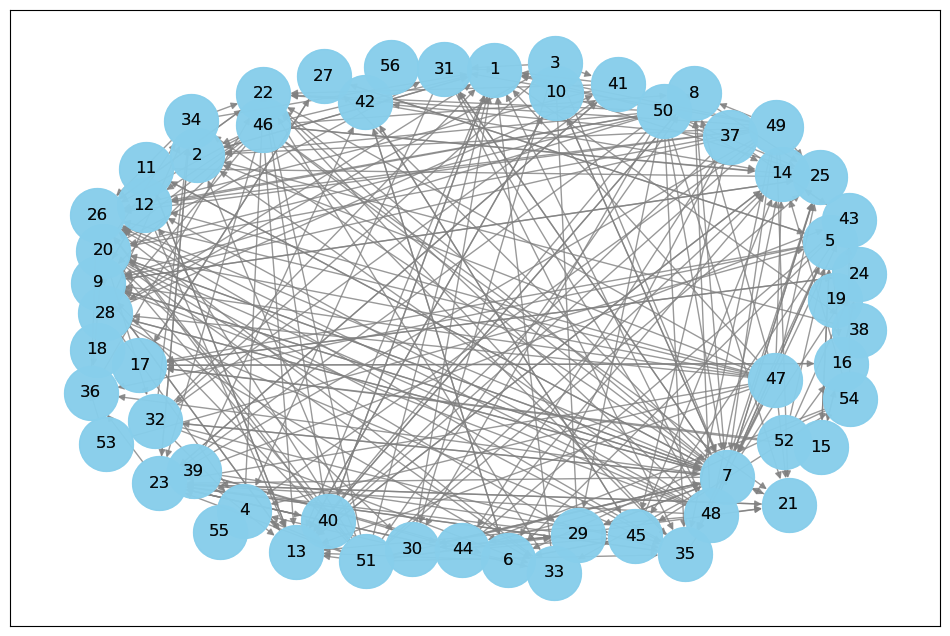

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
from IPython.display import display

connections = []
for c in allowed_connections:
    #print(str(c) + ' ' + str(allowed_connections[c]))
    if len(allowed_connections[c]) > 0:
        for i in allowed_connections[c]:
            connections.append((c, i))
# print(connections)

# Create an empty directed graph
graph = nx.DiGraph()

# Add the letters as nodes to the graph
services = list(range(1, len(services) + 1))
graph.add_nodes_from(services)

# Add the connections between the letters as edges to the graph
#graph.add_edges_from(connections)

# Draw the graph
# nx.draw(graph, with_labels=True)
# fig, ax = plt.subplots(figsize = (12, 8))
# layout = nxa.force_layout(graph)
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 8))
nx.draw_networkx(graph, pos=pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, alpha=.8)


# for c in connections:
for c in connections:
    n1, n2 = c
    graph.add_edge(n1, n2)
    
# pos = nx.spring_layout(graph)
# plt.clf()
nx.draw_networkx(graph, pos=pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, alpha=.8)
# plt.pause(0.1)

# ani = FuncAnimation(fig, update, frames=connections, repeat=False)

# display(ani.to_jshtml())

plt.show()

In [5]:
# from matplotlib.animation import FuncAnimation

# # Create a function that updates the graph with new data
# def update(edge):
#     graph.add_edge(num, num+1)
#     nx.draw_networkx(graph, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, alpha=.8)

# # Create an animation object that calls the update function
# ani = FuncAnimation(plt.gcf(), update, frames=range(50), repeat=True)
# plt.show()


In [6]:
# numbered_services = pd.read_csv('../data/allowed_connections.csv')
# services = options.iloc[:,0]
# connections = options.iloc[:,2]
# for i in range(len(services)):
#     print(str(services[i]) + ' | ' + str(connections[i]))